## Digit Recongnizer - Notebook

#### Importing Required Libraries

In [60]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Load the Data

In [61]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### Data Preprocessing

In [62]:

X = train.drop("label", axis=1)
y = train["label"]

X = X / 255.0
test = test / 255.0

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Building the Model

In [63]:
model = keras.Sequential([
    layers.Input(shape=(784,)),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

#### Compile the Model

In [64]:
model.compile(
    optimizer='adam',
    loss='crossentropy',
    metrics=['accuracy']
)

#### Training the Model

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=7,
    restore_best_weights=True
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.9144 - loss: 0.2881 - val_accuracy: 0.7735 - val_loss: 0.6056
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.9639 - loss: 0.1150 - val_accuracy: 0.9552 - val_loss: 0.1497
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9735 - loss: 0.0821 - val_accuracy: 0.9679 - val_loss: 0.0963
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9799 - loss: 0.0636 - val_accuracy: 0.9704 - val_loss: 0.0942
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.9826 - loss: 0.0532 - val_accuracy: 0.9688 - val_loss: 0.0963
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9841 - loss: 0.0473 - val_accuracy: 0.9733 - val_loss: 0.0927
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.9763 - val_loss: 0.0851
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9897 - loss: 0.0304 - val_accu

#### Visualizing Training Results

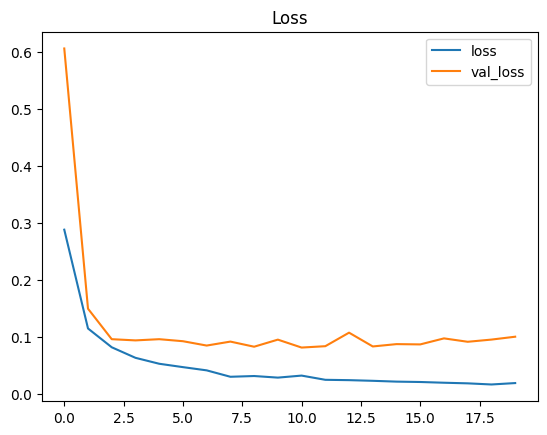

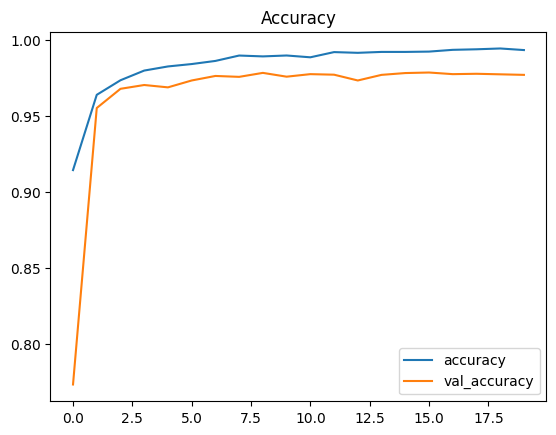

In [66]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Loss")
history_df[['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.show()

##### The first plot shows the training loss and validation loss over each epoch. At first val_loss is dropping similarlly as loss priticted from the train data, but soon they become closer to horizontal not improving accuracy anymore.

##### The second plot shows training and validation accuracy per epoch. Training and validation accuracy both increase and become near horizontal near the final which means a steady accuracy.

#### Evaluating accuracy

In [67]:
print(("Best Validation Loss: {:0.4f}" + 
       "\nBest Validation Accuracy: {:0.4f}").format(
           history_df['val_loss'].min(),
           history_df['val_accuracy'].max()))

Best Validation Loss: 0.0816
Best Validation Accuracy: 0.9786


#### Making actual predictions

In [68]:
pred= model.predict(test)
pred_labels = pred.argmax(axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


#### Creating Submission File

In [69]:
output = pd.DataFrame({
    "ImageId": range(1, len(pred_labels) + 1),
    "Label": pred_labels
})

submission_file_name = f'submission_{pd.Timestamp.now().strftime("%Y-%m-%d_%H-%M-%S")}.csv'

output.to_csv(submission_file_name, index=False)